# Atividade 02 - Regressão Linear (06/03/2020)

Importando bibliotecas que serão usadas na resoluação da atividade

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 01. Carregando dados

Carregando os dados em uma variável usando numpy

In [30]:
data = np.loadtxt('files/housing.data')

## 02. Separando apenas LSTAT e MEDV

Usaremos apenas LSTAT como atributo preditor e MEDV como atributo alvo. Essas duas ocupam as duas últimas colunas dos dados. Dessa forma, separaremos apenas essas duas colunas.

In [31]:
data = data[:,-2:]

## 03. Embaralhando as amostras e dividindo as amostras em treino e teste

Usando numpy como forma de embaralharos dados

In [32]:
np.random.shuffle(data)

Usando numpy para separar os dados entre treino e teste. Para isso, faremos uma pequena conta para obter o quanto 80% representa de todos os dados da amostra. Como forma de garantir que esse valor retornado seja um inteiro, retornaremos o valor arredondado do cálculo. `pt` é uma variável que representa a porcentagem de treino a ser usada.

In [42]:
pt = round(data.shape[0] * .8)

Agora que obtemos o valor que representa os 80%, podemos separar os dados de forma que a primeira quantidade representada por `pt` seja usado como dados de treino e os demais como dados de teste.

In [44]:
data_train = data[:pt,:]
data_test = data[pt:,:]

## 04. Aplicando Regressão Linear

Antes de aplicarmos a Regressão propriamente dita, teremos que construir a nossa classe que realizará a regressão linear

In [58]:
class SingleLinearRegression():
    def __init__(self):
        self.beta0 = None
        self.beta1 = None
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        
        x_mean = X.mean()
        y_mean = y.mean()
        
        x_dif = X-x_mean
        y_dif = y-y_mean
        
        xy = x_dif*y_dif
        xx = x_dif*x_dif
        
        a = sum(xy)
        b = sum(xx)
        
        self.beta1 = a/b
        self.beta0 = y_mean-(self.beta1*x_mean)
        
    
    def predict(self, X):
        return self.beta0+(self.beta1*X)

Agora que temos nossa classe contruída, podemos criar uma instância para o modelo que iremos usar.

In [59]:
lr = SingleLinearRegression()

Como os nossos dados estão apenas na divisão de treino e de teste, irei agora separá-los entre os valores de `X` e `y`.

In [54]:
X_train = np.array(data_train[:,0])
y_train = np.array(data_train[:,1])

Agora, com os nossos dados separados, iremos treinar os nosso modelo.

In [61]:
lr.fit(X_train, y_train)

Após treinar o nosso modelo, iremos agora predizer quais seriam os possíveis valores para os dados de testes que foram separados. No entato, teremos ainda que separar os dados de teste entre `X` e `y`.

In [63]:
X_test = data_test[:,0]
y_test = data_test[:,1]

predicted = lr.predict(X_test)

### Criando funções que servirão como métricas de avaliação para os dados que foram preditos

O uso da métrica $R^2$ já foi realizado no exercício anterior, po outro lado, a métrica $MSE$ ou $Mean Squared  Error$ mede a média dos erros quadrados, ou seja, para cada valor predito, é calculado o seu erro com o valor real, esses erros são elevados ao quadrado e somados e ao final, é tirado sua média.

Fórmula do $MSE$:

\begin{align*}
    MSE = \frac{1}{n}\sum_{i=0}^{n-1}(y_i - \hat{y_i})^2
\end{align*}

In [69]:
class functions():
    def __init__(self):
        pass
    
    # Residual Square Sum (RSS)
    def rss(self, y_true, y_pred):
        return np.sum((y_true-y_pred)**2)
    
    # TSS que será usada por R2
    def tss(self, y_true, y_pred):
        y_mean = np.mean(y_pred)
        return np.sum((y_true-y_mean)**2)
    
    # R2 Static
    def r2(self, y_true, y_pred):
        return 1-(self.rss(y_true, y_pred)/self.tss(y_true, y_pred))
    
    # MSE
    def mse(self, y_true, y_pred):
        e = y_true-y_pred
        e2 = e*e
        return (sum(e2)).mean()

#### a) Reportando $MSE$ e $R^2$

Antes de reportar esses valores, iremos logo criar um objeto para a classe que contém essas funções.

In [71]:
funcoes = functions()

Agora iremos reportar os valores para cada uma das métricas

In [72]:
print("MSE: ", funcoes.mse(y_test, predicted))
print("R^2: ", funcoes.r2(y_test, predicted))

MSE:  3153.670921974775
R^2:  0.6090889574483913


### Criando classe com funções para plotar gráficos

Iremos agora construir uma classe que contenha funções em que dado as informações necessárias, irá imprimir um gráfico em tela. Isso será usado com o propósito de evitar excesso de códigos repetitivos.

In [114]:
class graphs:
    def __init__(self):
        pass
    
    def graph_one(self, x, y, predicted, xlabel='LSTAT', ylabel='MEDV'):
        plt.scatter(x=x, y=y, c='blue')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(x, predicted, c='r')
        plt.show()
       
    
    def graph_two(self, y_true, y_predicted, xlabel='Valores Preditos', ylabel='Valores Alvos Originais'):
        plt.scatter(x=y_predicted, y=y_true)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(y_true, y_true, c='r')
        plt.show()

#### b) Plotando gráfico com dados originais e reta de regressão

Antes de plotar os gráficos, temos que criar o objeto que terá o conhecimento das funções a serem usadas.

In [116]:
graphs = graphs()

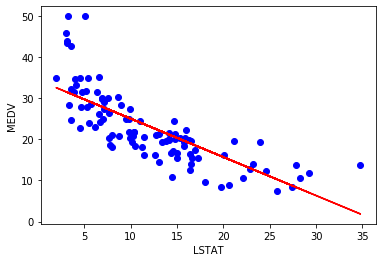

In [88]:
graphs.graph_one(X_test, y_test, predicted)

O gráfico acima mostra como está a distribuição da relação com o valor do atributo preditor e o valor do atributo alvo. A reta mostra a regressão predita.

#### c) Plotando gráfico com valores preditos em X e reais em Y com reta Y=X

Abaixo temos um gráfico com uma relação entre os dados originais, no eixo de X e os dados preditos, no eixo de Y.

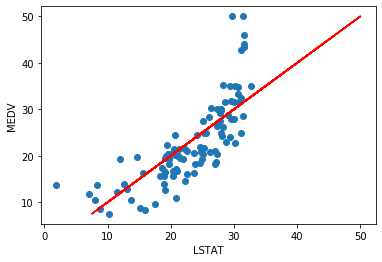

In [92]:
graphs.graph_two(y_test, predicted)

#### d) Usando termo $LSTAT^2$

Antes de aplicarmos a regressão linear propriamente dita sobre os dados, temos que elevar ao quadrado o valor do atributo preditor. Assim sendo, separaremos os dados novamente atribuindo os seus valores corretamente.

In [93]:
X_train_2 = X_train * X_train
X_test_2 = X_test * X_test

Criaremos um novo modelo para a Regressão Lienar.

In [106]:
lr2 = SingleLinearRegression()

Treinaremos o novo modelo.

In [107]:
lr2.fit(X_train_2, y_train)

Agora iremos predizer os novos valores dado a modificação do atributo preditor.

In [110]:
predicted2 = lr2.predict(X_test_2)

##### Reportando os valores para as métricas $MSE$ e $R^2$

In [111]:
print("MSE: ", funcoes.mse(y_test, predicted2))
print("R^2: ", funcoes.r2(y_test, predicted2))

MSE:  4619.739390938367
R^2:  0.42669473699108595


##### Plotando primeiro gráfico

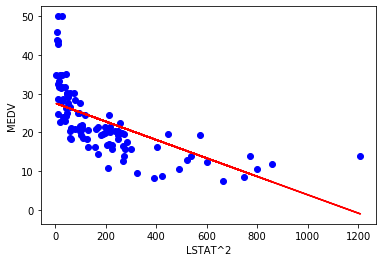

In [113]:
graphs.graph_one(x=X_test_2, y=y_test, predicted=predicted2, xlabel="LSTAT^2")

##### Plotando segundo gráfico

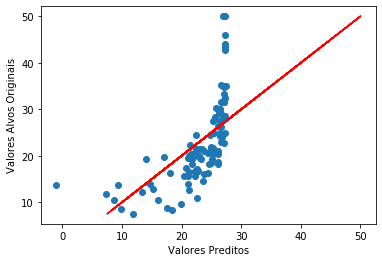

In [117]:
graphs.graph_two(y_true=y_test, y_predicted=predicted2)

#### e) Usando termo $LSTAT^3$

Antes de criarmos esse modelo também, precisaremos fazer o mesmo que com o anterior, no caso, separar os dados e salvar da maneira que precisaremos.

In [127]:
X_train_3 = X_train ** 3
X_test_3 = X_test ** 3

Criaremos um novo modelo para a Regressão Linear.

In [128]:
lr3 = SingleLinearRegression()

Treinaremos o novo modelo com os valores dos atributos atualizados.

In [129]:
lr3.fit(X_train_3, y_train)

Agora iremos predizer novos valores com base no modelo criado e no valor dos atributos de teste atualizados

In [130]:
predicted3 = lr3.predict(X_test_3)

##### Reportando os valores das métricas para o $MSE$ e para o $R^2$

In [131]:
print("MSE: ", funcoes.mse(y_test, predicted3))
print("R^2: ", funcoes.r2(y_test, predicted3))

MSE:  5791.199373988613
R^2:  0.28109774842539115


##### Plotando primeiro gráfico

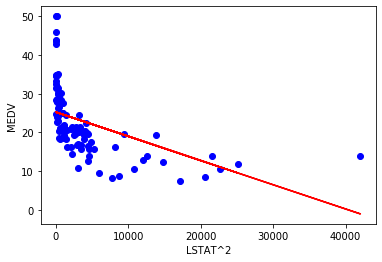

In [132]:
graphs.graph_one(x=X_test_3, y=y_test, predicted=predicted3, xlabel="LSTAT^2")

##### Plotando segundo gráfico

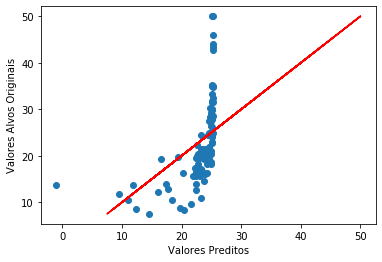

In [133]:
graphs.graph_two(y_true=y_test, y_predicted=predicted3)

Repositório de [Machine Learning](https://www.github.com/wesleypedro/Machine-Learning) no [GitHub](https://www.github.com/wesleypedro/).